<h2><u>Predictive Analystics</u></h2>

# Module 4 – Regression Part 1
<h2> Demo: Predict Graduate University Admissions Using Regression </h2>

To download the dataset, [**Click Here!**](https://www.kaggle.com/mohansacharya/graduate-admissions)

### Dataset:



This dataset is created for prediction of graduate admissions for an Indian based on certain test scores. It contains the following attributes:

- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose (out of 5)
- Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [1]:
!wget https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv
#!wget https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv --no-check-certificate

--2023-01-21 04:35:58--  https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f1x86l7xkdkz6ke/Admission_Predict.csv [following]
--2023-01-21 04:35:58--  https://www.dropbox.com/s/raw/f1x86l7xkdkz6ke/Admission_Predict.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fa25532b5b58e559a4f90dfc0.dl.dropboxusercontent.com/cd/0/inline/B095OeffgbycmcbiB_rj7TPHWky5WlcHHS3_plpPCSqczgbW1rE0ac3CTflzXPC4OAFgjEOOKfJxbejaUIMApwYwLRZp2jAozEyAujL4QDVZWM3G8quh-ZXJr2wdukgRQ1r-h7Xg9YjHjzFrrvj1DiKHrcv1Em2oGFzcWhnmlC-HGA/file# [following]
--2023-01-21 04:35:59--  https://uc1fa25532b5b58e559a4f90dfc0.dl.dropboxusercontent.com/cd/0/inline/B095OeffgbycmcbiB_rj7TPHWky5WlcHHS3_plpPCSqczgbW1r

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Admission_Predict.csv')
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
## Analyzing the data using Pandas Profiling
# !pip install pandas-profiling==2.7.1 

#Generating a Pandas Profiling Report 

# import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

Let's drop the **Serial No.** column as it is of no use to us -


In [4]:
df.drop('Serial No.', inplace = True, axis = 1)
df.shape

(500, 8)

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Cool! We do not have any Null Values in the Data set. This time, we are lucky but, this is not the case most of the times.

### Simple Linear Regression




We obtain a relationship between 2 variables x & y by predicting the value of y based on x

**x** - Independent Variable (Feature)

**y** - Dependent Variable (Target Variable/ Output Variable)

It is called **Simple Linear Regression** because it examines relationship between 2 variables only

Why Linear?

When the Independent Variable increases (or decreases), the dependent variable increases or decreases in a Linear Fashion

In [7]:
x = df['GRE Score']
y = df['Chance of Admit'] #Target Variable
print(x.shape, y.shape) 

(500,) (500,)


In [8]:
print(x.head())
print(y.head())

0    337
1    324
2    316
3    322
4    314
Name: GRE Score, dtype: int64
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64


In [9]:
#Converting x & y into NumPy Arrays

x = np.array(x)
y = np.array(y)
x.shape, y.shape

((500,), (500,))

In [10]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x.shape, y.shape

((500, 1), (500, 1))

#### Scaling the Data

In [11]:
x[0:5,0], y[0:5,0]

(array([337, 324, 316, 322, 314]), array([0.92, 0.76, 0.72, 0.8 , 0.65]))

In [12]:
#Scaling the Data

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()
x = scaler1.fit_transform(x)
y = scaler2.fit_transform(y)

In [13]:
x[0:5,0], y[0:5,0]

(array([ 1.81923762,  0.66714832, -0.0418297 ,  0.48990382, -0.21907421]),
 array([ 1.40610734,  0.27134907, -0.0123405 ,  0.55503864, -0.50879724]))

#### Splitting the Data for training and testing

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 1) (100, 1) (400, 1) (100, 1)


#### Building a Simple Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [18]:
lr_model.coef_, lr_model.intercept_

(array([[0.84143726]]), array([-0.00178305]))

#### Evaluating the Model

In [19]:
accuracy_lr = lr_model.score(x_test, y_test)
print(accuracy_lr)

0.5860965504584403


Oh. We could achieve an Accuracy of just **61.7%** on the testing data using a Simple Linear Regression Model which is very bad

Let us check the correlation between the variables to understand how they affect the target variable (i.e., **Chance of Admit**)

In [20]:
y_pred = lr_model.predict(x_test)

In [21]:
y_pred.shape

(100, 1)

In [22]:
x_test = scaler1.inverse_transform(x_test)
y_pred = scaler2.inverse_transform(y_pred).round(2)
y_test = scaler2.inverse_transform(y_test).round(2)
x_test[0:5,:], y_pred[0:5,0], y_test[0:5,0]

(array([[334.],
        [314.],
        [315.],
        [312.],
        [326.]]),
 array([0.91, 0.7 , 0.71, 0.67, 0.82]),
 array([0.93, 0.84, 0.39, 0.77, 0.74]))

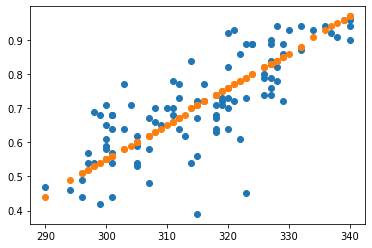

In [23]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)
plt.show()

#### Features correlation

Pandas **df.corr()** is used to find the pairwise correlation of all columns in the dataframe

In [24]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


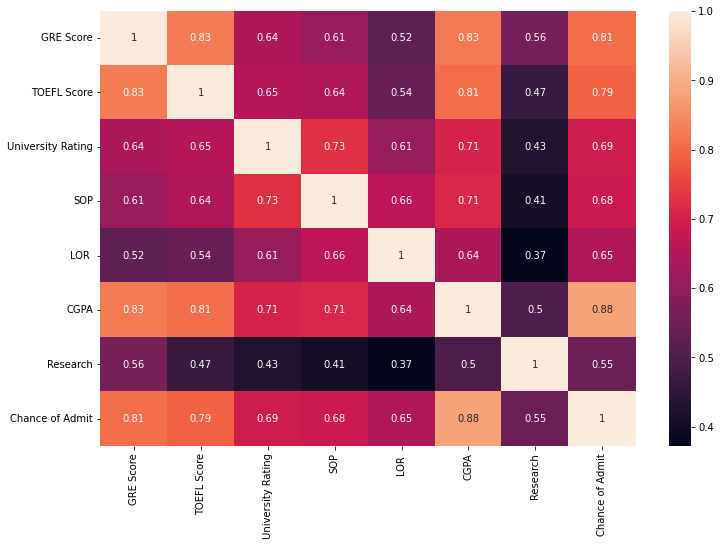

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

___
**Observations:**
- Students who have **High GRE** Score tend to also have high TOEFL Score. That means they are positively correlated
- **CGPA & TOEFL Score** and **Chance of Admit** is also highly correlated which suggests that CGPA & TOEFL Score are very important factors
___

### Multiple Linear Regression



Now, let us try using **multiple features** (for e.g. **GRE Score, TOEFL Score, SOP, LOR, CGPA**, etc.) to predict the **Chance of Admit** using **Multiple Linear Regression**


Examines relationship between more than 2 variables

Whoa! This is what we are going to use because we have many dependent variables such as **GRE Score**, **TOEFL Score**, etc and one independent(or target varible) **Chance of Admit**

In [26]:
x = df.drop(columns = ['Chance of Admit']) # features
y = df['Chance of Admit'] #Target Variable

In [27]:
print(x.shape, y.shape) 
print(type(x), type(y))

(500, 7) (500,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [28]:
#Converting x & y into NumPy Arrays

x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
print(x.shape, y.shape)

(500, 7) (500, 1)


#### Scaling the data

In [29]:
x[0:5,:], y[0:5,0]

(array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
        [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
        [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
        [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
        [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ]]),
 array([0.92, 0.76, 0.72, 0.8 , 0.65]))

In [30]:
#Scaling the Data

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()

x = scaler1.fit_transform(x)
y = scaler2.fit_transform(y)

x[0:5,:], y[0:5,0]

(array([[ 1.81923762,  1.77886545,  0.77558214,  1.13735981,  1.09894429,
          1.77680627,  0.88640526],
        [ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  1.09894429,
          0.48585943,  0.88640526],
        [-0.0418297 , -0.52536441, -0.09979274, -0.37777315,  0.01730621,
         -0.95404281,  0.88640526],
        [ 0.48990382,  0.46216267, -0.09979274,  0.12727117, -1.06433187,
          0.15484742,  0.88640526],
        [-0.21907421, -0.68995225, -0.97516761, -1.3878618 , -0.52351283,
         -0.6064802 , -1.12815215]]),
 array([ 1.40610734,  0.27134907, -0.0123405 ,  0.55503864, -0.50879724]))

#### Splitting the data for training and testing

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 7) (100, 7) (400, 1) (100, 1)


#### Train & Evaluate a Linear Regression Model



In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [33]:
lr_model.coef_, lr_model.intercept_

(array([[0.19482262, 0.12909489, 0.02081226, 0.01273465, 0.11302848,
         0.48219942, 0.08458618]]), array([0.00773568]))

In [34]:
accuracy_lr = lr_model.score(x_test, y_test)
print(accuracy_lr)

0.8188432567829627


Okay, good! We achieved an Accuracy of **81.9%** on the testing data using a Multiple Linear Regression Model.

In [35]:
y_pred = lr_model.predict(x_test)

In [36]:
# x = scaler1.fit_transform(x)
# y = scaler2.fit_transform(y)
x_test = scaler1.inverse_transform(x_test)
y_pred = scaler2.inverse_transform(y_pred).round(2)
y_test = scaler2.inverse_transform(y_test).round(2)
x_test[0:5,:], y_pred[0:5,0], y_test[0:5,0]

(array([[334.  , 116.  ,   4.  ,   4.  ,   3.5 ,   9.54,   1.  ],
        [314.  , 108.  ,   4.  ,   4.5 ,   4.  ,   9.04,   1.  ],
        [315.  , 105.  ,   2.  ,   2.  ,   2.5 ,   7.65,   0.  ],
        [312.  , 109.  ,   3.  ,   3.  ,   3.  ,   8.69,   0.  ],
        [326.  , 112.  ,   3.  ,   3.5 ,   3.  ,   9.05,   1.  ]]),
 array([0.91, 0.8 , 0.57, 0.71, 0.82]),
 array([0.93, 0.84, 0.39, 0.77, 0.74]))